In [1]:
import tensorflow as tf
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
data_dir = r"C:\Users\Moham\OneDrive\Desktop\miniproject\cgfin"

In [3]:
data = tf.keras.utils.image_dataset_from_directory(data_dir)

Found 411 files belonging to 2 classes.


In [4]:
data_iterator = data.as_numpy_iterator()

In [5]:
batch = data_iterator.next()

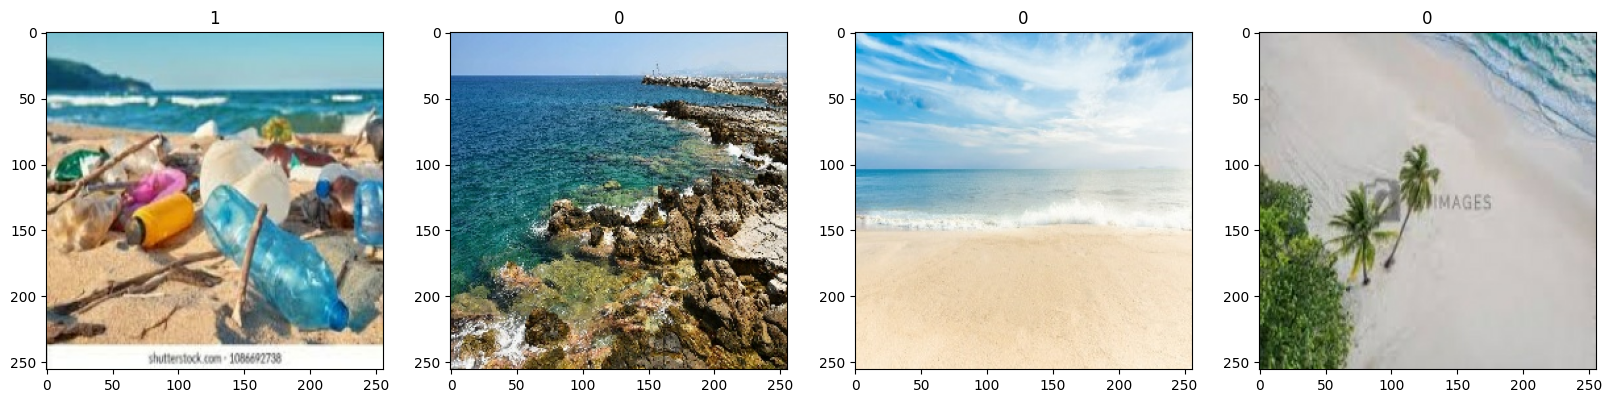

In [6]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [7]:
data = data.map(lambda x,y: (x/255, y))

In [8]:
data.as_numpy_iterator().next()

(array([[[[0.5686275 , 0.68235296, 0.7529412 ],
          [0.5686275 , 0.68235296, 0.7529412 ],
          [0.5686275 , 0.68235296, 0.7529412 ],
          ...,
          [0.60784316, 0.7294118 , 0.8       ],
          [0.6039216 , 0.7254902 , 0.79607844],
          [0.6039216 , 0.7254902 , 0.79607844]],
 
         [[0.5686275 , 0.68235296, 0.7529412 ],
          [0.5686275 , 0.68235296, 0.7529412 ],
          [0.5686275 , 0.68235296, 0.7529412 ],
          ...,
          [0.60784316, 0.7294118 , 0.8       ],
          [0.60784316, 0.7294118 , 0.8       ],
          [0.60784316, 0.7294118 , 0.8       ]],
 
         [[0.5686275 , 0.68235296, 0.7529412 ],
          [0.5686275 , 0.68235296, 0.7529412 ],
          [0.5686275 , 0.68235296, 0.7529412 ],
          ...,
          [0.60784316, 0.73333335, 0.7921569 ],
          [0.60784316, 0.73333335, 0.7921569 ],
          [0.60784316, 0.73333335, 0.7921569 ]],
 
         ...,
 
         [[0.6431373 , 0.6431373 , 0.6431373 ],
          [0.64313

In [9]:
len(data)

13

In [10]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [11]:
train_size

9

In [12]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [13]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [15]:
model = Sequential()

In [16]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

C:\Users\Moham\OneDrive\Desktop\miniproject\project\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       3,686,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
logdir='logs'

In [20]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [21]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 11s 874ms/step - accuracy: 0.5744 - loss: 0.9597 - val_accuracy: 0.8438 - val_loss: 0.4867
Epoch 2/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 9s 739ms/step - accuracy: 0.7485 - loss: 0.5893 - val_accuracy: 0.7500 - val_loss: 0.4825
Epoch 3/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 7s 763ms/step - accuracy: 0.7543 - loss: 0.4789 - val_accuracy: 0.7188 - val_loss: 0.4217
Epoch 4/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 8s 790ms/step - accuracy: 0.7518 - loss: 0.4375 - val_accuracy: 0.8438 - val_loss: 0.4294
Epoch 5/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 7s 759ms/step - accuracy: 0.8102 - loss: 0.3606 - val_accuracy: 0.9062 - val_loss: 0.3140
Epoch 6/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 8s 788ms/step - accuracy: 0.8705 - loss: 0.3577 - val_accuracy: 0.8906 - val_loss: 0.3270
Epoch 7/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 7s 767ms/step - accuracy: 0.8755 - loss: 0.2716 - val_accuracy: 0.9062 - val_loss: 0.1809
Epoch 8/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 8s 782ms/step - accuracy: 0.8348 - loss: 0.3695 - val_accuracy: 0.9531 - val_loss

In [22]:
hist.history

{'accuracy': [0.6840277910232544,
  0.7083333134651184,
  0.7534722089767456,
  0.7673611044883728,
  0.8125,
  0.8645833134651184,
  0.8645833134651184,
  0.8506944179534912,
  0.9305555820465088,
  0.9236111044883728,
  0.90625,
  0.9201388955116272,
  0.9409722089767456,
  0.96875,
  0.9861111044883728,
  0.9930555820465088,
  0.9895833134651184,
  0.9756944179534912,
  0.9756944179534912,
  0.9930555820465088],
 'loss': [0.7991330623626709,
  0.5846352577209473,
  0.4741136133670807,
  0.43588051199913025,
  0.3691054582595825,
  0.3303792178630829,
  0.2667802572250366,
  0.33622297644615173,
  0.26239898800849915,
  0.1825740933418274,
  0.20336446166038513,
  0.18106074631214142,
  0.15437838435173035,
  0.10696296393871307,
  0.07552585750818253,
  0.05816423147916794,
  0.04827744513750076,
  0.05790385231375694,
  0.057681605219841,
  0.04100623354315758],
 'val_accuracy': [0.84375,
  0.75,
  0.71875,
  0.84375,
  0.90625,
  0.890625,
  0.90625,
  0.953125,
  0.96875,
  0.890

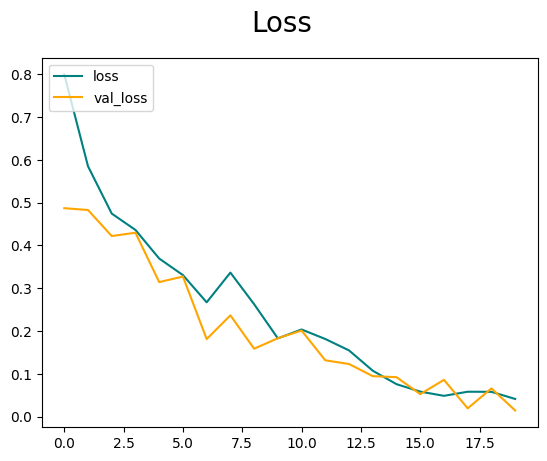

In [23]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

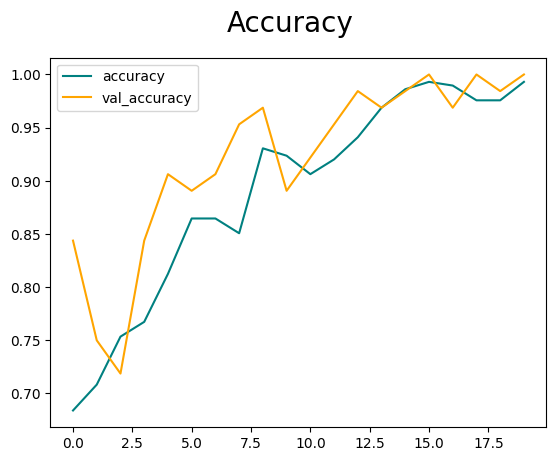

In [24]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [25]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [26]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [27]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step


In [28]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


In [29]:
import cv2

In [34]:
img_path=r"C:\Users\Moham\OneDrive\Desktop\miniproject\cgchk"
if os.path.exists(img_path) and os.path.isdir(img_path):
    files = os.listdir(img_path)
    image_files = [f for f in files if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif'))]
    image_path = os.path.join(img_path, image_files[0])
    print(image_path)

C:\Users\Moham\OneDrive\Desktop\miniproject\cgchk\OIP (1).jpeg


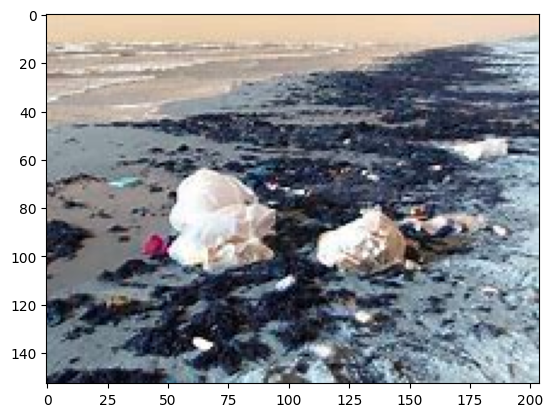

In [35]:
img = cv2.imread(image_path)
plt.imshow(img)
plt.show()

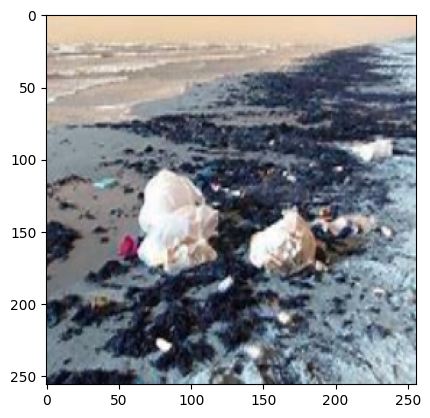

In [36]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [37]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


In [38]:
yhat

array([[0.9995823]], dtype=float32)

In [40]:
if 1>= yhat >= 0.5: 
    print(f'beach is polluted')
else:
    print(f'clean beach')

beach is polluted


In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model.save(os.path.join(r'C:\Users\Moham\OneDrive\Desktop\miniproject','aiclassifier.h5'))

In [ ]:
new_model = load_model(r'C:\Users\Moham\OneDrive\Desktop\miniproject\aiclassifier.h5')

In [ ]:
new_model.predict(np.expand_dims(resize/255, 0))

In [ ]:
if 1>=new_model.predict(np.expand_dims(resize/255, 0))>0.5:
    print(f'Predicted class is real')
else:
    print(f'Predicted class is fake')
    